In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

In [2]:
data = pd.read_csv("dataCA/pr_CA.csv",index_col="MSN")

data2 = data.drop(['Data_Status', 'State'],axis=1)
data2
a = "1046492 1167142 1,192,848	1,189,801	1,148,722	1,220,587	1,202,586	1,154,079	1,196,279	1,290,698	1,226,364	1,192,869	1,232,826	1,226,313	1,227,952	1,304,360	1,217,724	1,308,727	1,359,856	1,420,797	1,367,856	1,367,567	1,355,310	1,354,131	1,369,438	1,325,392	1,361,384	1,358,381	1,486,214	1,485,795	1,426,721	1,417,985	1,425,659	1,455,716	1,489,320	1,449,101	1,488,574	1,474,374	1,511,586	1,483,981	1,466,657	1,500,559	1,437,024	1,440,463	1,355,028	1,347,770	1,367,103	1,415,455	1,440,273	1,455,751	1,507,721"
a = a.split()
a = a[:]
Resid_total = pd.DataFrame(a)
Resid_total = Resid_total.T
Resid_total.rename(index={0:"ResidCA"},inplace=True)
Resid_total
Resid_total.columns = data2.columns
data2 = data2.dropna()

In [3]:
X = data2.transpose()
y = Resid_total.transpose()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [5]:
y_pred

array(['1,500,559', '1,507,721', '1,347,770', '1,192,869', '1,154,079',
       '1,367,567', '1,192,869', '1,367,567', '1,192,848', '1,367,567',
       '1,217,724'], dtype=object)

In [6]:
y_test

,ResidCA
2013,"1,440,463"
2010,"1,466,657"
2016,"1,367,103"
1982,"1,232,826"
1994,"1,369,438"
2001,"1,417,985"
1987,"1,308,727"
2002,"1,425,659"
1973,"1,189,801"
2000,"1,426,721"


In [7]:
y_test['Prediction'] = y_pred
y_test['ResidCA'] = y_test['ResidCA'].str.replace(',', '').astype(int)
y_test['Prediction'] = y_test['Prediction'].str.replace(',', '').astype(int)
y_test = y_test.sort_index(ascending=True)

<AxesSubplot:>

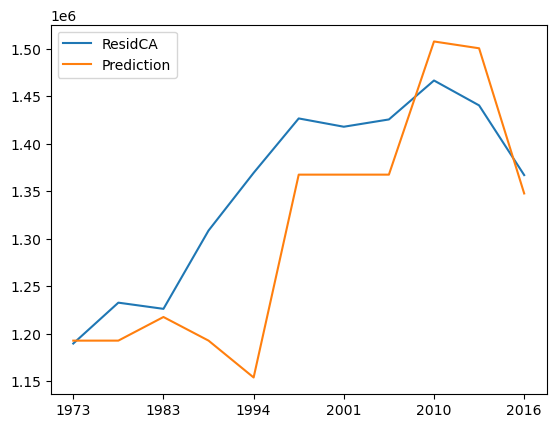

In [8]:
y_test.plot()

In [9]:
y_test['Difference'] = y_test['ResidCA'] - y_test['Prediction']
y_test['% Difference'] = y_test['Difference'] / y_test['ResidCA'] * 100
y_test

,ResidCA,Prediction,Difference,% Difference
1973,1189801,1192848,-3047,-0.256093
1982,1232826,1192869,39957,3.241090
1983,1226313,1217724,8589,0.700392
1987,1308727,1192869,115858,8.852725
1994,1369438,1154079,215359,15.726086
2000,1426721,1367567,59154,4.146151
2001,1417985,1367567,50418,3.555609
2002,1425659,1367567,58092,4.074747
2010,1466657,1507721,-41064,-2.799837
2013,1440463,1500559,-60096,-4.171992


In [10]:
within5, totalRows = 0, 0
for index, row in y_test.iterrows():
    if row['% Difference'] >= -5 and row['% Difference'] <= 5:
        within5 += 1
    totalRows += 1
accuracy = within5/int(totalRows)
print("Accuracy (5%):" + str(accuracy))

Accuracy (5%):0.8181818181818182


In [11]:
data3 = pd.concat([data2, Resid_total], axis=0)
data3

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
ARICD,0.49,0.64,0.64,0.69,1.47,1.62,1.6,1.7,1.81,2.72,...,14.83,16.79,15.59,15.97,13.57,10.04,9.9,12.56,13.42,11.36
ARICV,39.0,51.9,52.3,60.5,115.9,141.0,149.6,169.1,184.8,387.1,...,891.2,903.8,937.0,916.3,834.5,614.1,592.7,758.6,744.6,636.3
ARTCD,0.49,0.64,0.64,0.69,1.47,1.62,1.6,1.7,1.81,2.72,...,14.83,16.79,15.59,15.97,13.57,10.04,9.9,12.56,13.42,11.36
ARTCV,39.0,51.9,52.3,60.5,115.9,141.0,149.6,169.1,184.8,387.1,...,891.2,903.8,937.0,916.3,834.5,614.1,592.7,758.6,744.6,636.3
ARTXD,0.49,0.64,0.64,0.69,1.47,1.62,1.6,1.7,1.81,2.72,...,14.83,16.79,15.59,15.97,13.57,10.04,9.9,12.56,13.42,11.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WXICD,4.14,3.97,4.23,4.63,4.63,4.95,5.51,6.26,7.75,9.43,...,35.56,34.62,33.37,33.91,32.88,32.66,32.69,32.94,29.79,26.87
WXICV,10.5,10.1,11.0,15.5,15.2,14.5,21.7,20.6,26.2,31.3,...,70.5,69.6,74.2,67.6,54.8,56.6,44.1,54.2,41.2,32.8
ZWCDP,748.0,738.0,748.0,681.0,750.0,596.0,651.0,739.0,750.0,782.0,...,774.0,1020.0,965.0,1175.0,1158.0,1024.0,1166.0,1102.0,894.0,1206.0
ZWHDP,3169.0,3690.0,3278.0,3396.0,3297.0,3609.0,3031.0,3050.0,3139.0,3200.0,...,3182.0,2741.0,2707.0,2091.0,2342.0,2438.0,2442.0,2539.0,2946.0,2564.0


In [12]:
data4 = data3.transpose()

data4['ResidCA'] = data4['ResidCA'].replace(',', '', regex=True)
data4['ResidCA'] = data4['ResidCA'].astype(int)

data4

,ARICD,ARICV,ARTCD,ARTCV,ARTXD,ARTXV,AVACD,AVACV,AVTCD,AVTCV,...,WWSCB,WWTCD,WWTCV,WWTXD,WWTXV,WXICD,WXICV,ZWCDP,ZWHDP,ResidCA
1970,0.49,39.0,0.49,39.0,0.49,39.0,2.17,23.9,2.17,23.9,...,40107.0,1.39,55.8,1.4,55.4,4.14,10.5,748.0,3169.0,1046492
1971,0.64,51.9,0.64,51.9,0.64,51.9,2.21,22.7,2.21,22.7,...,40860.0,1.4,57.3,1.41,57.0,3.97,10.1,738.0,3690.0,1167142
1972,0.64,52.3,0.64,52.3,0.64,52.3,2.19,23.0,2.19,23.0,...,43743.0,1.42,61.9,1.42,61.7,4.23,11.0,748.0,3278.0,1192848
1973,0.69,60.5,0.69,60.5,0.69,60.5,2.36,24.3,2.36,24.3,...,44621.0,1.45,64.6,1.45,64.4,4.63,15.5,681.0,3396.0,1189801
1974,1.47,115.9,1.47,115.9,1.47,115.9,3.23,32.3,3.23,32.3,...,46163.0,1.54,71.0,1.54,70.8,4.63,15.2,750.0,3297.0,1148722
1975,1.62,141.0,1.62,141.0,1.62,141.0,3.45,28.5,3.45,28.5,...,43495.0,1.55,67.6,1.56,67.4,4.95,14.5,596.0,3609.0,1220587
1976,1.6,149.6,1.6,149.6,1.6,149.6,3.59,28.4,3.59,28.4,...,49434.0,1.57,77.8,1.58,77.7,5.51,21.7,651.0,3031.0,1202586
1977,1.7,169.1,1.7,169.1,1.7,169.1,3.97,33.0,3.97,33.0,...,51882.0,1.62,84.2,1.63,83.9,6.26,20.6,739.0,3050.0,1154079
1978,1.81,184.8,1.81,184.8,1.81,184.8,4.29,38.0,4.29,38.0,...,54569.0,1.65,90.1,1.65,89.9,7.75,26.2,750.0,3139.0,1196279
1979,2.72,387.1,2.72,387.1,2.72,387.1,5.73,48.7,5.73,48.7,...,57110.0,1.88,107.3,1.88,107.2,9.43,31.3,782.0,3200.0,1290698


In [13]:
train_data = data4.iloc[:48]
test_data = data4.iloc[49:]

# Prepare the training data
X_train_2year = train_data.drop('ResidCA', axis=1)
y_train_2year = train_data['ResidCA']

In [14]:
dt_model_2year = DecisionTreeRegressor(random_state=42)
dt_model_2year.fit(X_train_2year, y_train_2year)

DecisionTreeRegressor(random_state=42)

In [15]:
test_data = data4.iloc[49:51]
X_test = test_data.drop('ResidCA', axis=1)
y_pred = dt_model_2year.predict(X_test)

In [16]:
test_data_filtered = test_data.loc[:, ['ResidCA']]
test_data_filtered['predictions'] = y_pred
test_data_filtered

,ResidCA,predictions
2019,1455751,1440463.0
2020,1507721,1440463.0


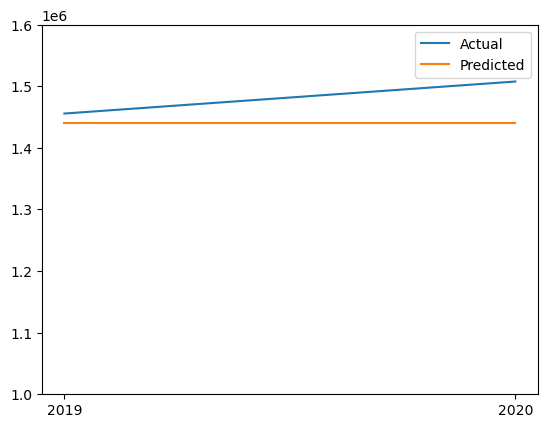

In [17]:
plt.plot(test_data_filtered['ResidCA'], label='Actual')
plt.plot(test_data_filtered['predictions'], label='Predicted')
plt.ylim(1000000, 1600000)
plt.legend()
plt.show()

In [18]:
# Evaluate the model using mean absolute error, mean squared error, and R^2
mae = mean_absolute_error(test_data_filtered['ResidCA'], y_pred)
mse = mean_squared_error(test_data_filtered['ResidCA'], y_pred)
r2 = r2_score(test_data_filtered['ResidCA'], y_pred)
mape = mean_absolute_percentage_error(test_data_filtered["ResidCA"], y_pred)

# Print the evaluation metrics
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('R^2 Score:', r2)
print('MAPE:', mape)

Mean Absolute Error: 41273.0
Mean Squared Error: 2378680754.0
R^2 Score: -2.5228221340674444
MAPE: 0.027555422500944136


In [19]:
data4 = data3.transpose()

data4['ResidCA'] = data4['ResidCA'].replace(',', '', regex=True)
data4['ResidCA'] = data4['ResidCA'].astype(int)

data4 = data4.dropna()
data4

,ARICD,ARICV,ARTCD,ARTCV,ARTXD,ARTXV,AVACD,AVACV,AVTCD,AVTCV,...,WWSCB,WWTCD,WWTCV,WWTXD,WWTXV,WXICD,WXICV,ZWCDP,ZWHDP,ResidCA
1970,0.49,39.0,0.49,39.0,0.49,39.0,2.17,23.9,2.17,23.9,...,40107.0,1.39,55.8,1.4,55.4,4.14,10.5,748.0,3169.0,1046492
1971,0.64,51.9,0.64,51.9,0.64,51.9,2.21,22.7,2.21,22.7,...,40860.0,1.4,57.3,1.41,57.0,3.97,10.1,738.0,3690.0,1167142
1972,0.64,52.3,0.64,52.3,0.64,52.3,2.19,23.0,2.19,23.0,...,43743.0,1.42,61.9,1.42,61.7,4.23,11.0,748.0,3278.0,1192848
1973,0.69,60.5,0.69,60.5,0.69,60.5,2.36,24.3,2.36,24.3,...,44621.0,1.45,64.6,1.45,64.4,4.63,15.5,681.0,3396.0,1189801
1974,1.47,115.9,1.47,115.9,1.47,115.9,3.23,32.3,3.23,32.3,...,46163.0,1.54,71.0,1.54,70.8,4.63,15.2,750.0,3297.0,1148722
1975,1.62,141.0,1.62,141.0,1.62,141.0,3.45,28.5,3.45,28.5,...,43495.0,1.55,67.6,1.56,67.4,4.95,14.5,596.0,3609.0,1220587
1976,1.6,149.6,1.6,149.6,1.6,149.6,3.59,28.4,3.59,28.4,...,49434.0,1.57,77.8,1.58,77.7,5.51,21.7,651.0,3031.0,1202586
1977,1.7,169.1,1.7,169.1,1.7,169.1,3.97,33.0,3.97,33.0,...,51882.0,1.62,84.2,1.63,83.9,6.26,20.6,739.0,3050.0,1154079
1978,1.81,184.8,1.81,184.8,1.81,184.8,4.29,38.0,4.29,38.0,...,54569.0,1.65,90.1,1.65,89.9,7.75,26.2,750.0,3139.0,1196279
1979,2.72,387.1,2.72,387.1,2.72,387.1,5.73,48.7,5.73,48.7,...,57110.0,1.88,107.3,1.88,107.2,9.43,31.3,782.0,3200.0,1290698


In [20]:
train_data = data4.iloc[:45]
test_data = data4.iloc[46:]

# Prepare the training data
X_train_5year = train_data.drop('ResidCA', axis=1)
y_train_5year = train_data['ResidCA']

In [21]:
dt_model_5year = DecisionTreeRegressor(random_state=42)
dt_model_5year.fit(X_train_5year, y_train_5year)

DecisionTreeRegressor(random_state=42)

In [22]:
test_data = data4.iloc[46:51]
X_test = test_data.drop('ResidCA', axis=1)
y_pred = dt_model_5year.predict(X_test)

In [23]:
test_data_filtered = test_data.loc[:, ['ResidCA']]
test_data_filtered['predictions'] = y_pred
test_data_filtered


,ResidCA,predictions
2016,1367103,1358381.0
2017,1415455,1358381.0
2018,1440273,1358381.0
2019,1455751,1440463.0
2020,1507721,1449101.0


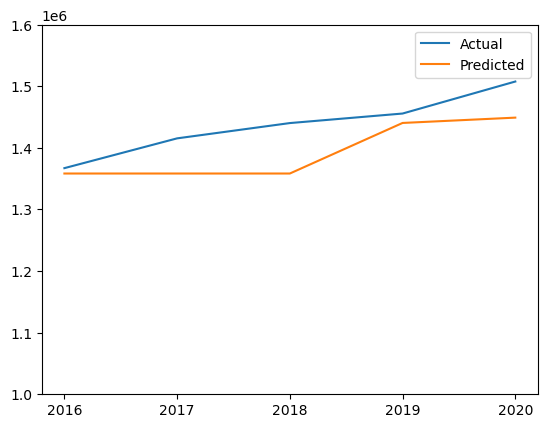

In [24]:
plt.plot(test_data_filtered['ResidCA'], label='Actual')
plt.plot(test_data_filtered['predictions'], label='Predicted')
plt.ylim(1000000, 1600000)
plt.legend()
plt.show()

In [25]:
# Evaluate the model using mean absolute error, mean squared error, and R^2
mae = mean_absolute_error(test_data_filtered['ResidCA'], y_pred)
mse = mean_squared_error(test_data_filtered['ResidCA'], y_pred)
r2 = r2_score(test_data_filtered['ResidCA'], y_pred)
mape = mean_absolute_percentage_error(test_data_filtered["ResidCA"], y_pred)

# Print the evaluation metrics
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('R^2 Score:', r2)
print('MAPE:', mape)

Mean Absolute Error: 44319.2
Mean Squared Error: 2741968353.6
R^2 Score: -0.279713661995882
MAPE: 0.03058845284341623


In [26]:
data4 = data3.transpose()

data4['ResidCA'] = data4['ResidCA'].replace(',', '', regex=True)
data4['ResidCA'] = data4['ResidCA'].astype(int)

data4 = data4.dropna()
data4

,ARICD,ARICV,ARTCD,ARTCV,ARTXD,ARTXV,AVACD,AVACV,AVTCD,AVTCV,...,WWSCB,WWTCD,WWTCV,WWTXD,WWTXV,WXICD,WXICV,ZWCDP,ZWHDP,ResidCA
1970,0.49,39.0,0.49,39.0,0.49,39.0,2.17,23.9,2.17,23.9,...,40107.0,1.39,55.8,1.4,55.4,4.14,10.5,748.0,3169.0,1046492
1971,0.64,51.9,0.64,51.9,0.64,51.9,2.21,22.7,2.21,22.7,...,40860.0,1.4,57.3,1.41,57.0,3.97,10.1,738.0,3690.0,1167142
1972,0.64,52.3,0.64,52.3,0.64,52.3,2.19,23.0,2.19,23.0,...,43743.0,1.42,61.9,1.42,61.7,4.23,11.0,748.0,3278.0,1192848
1973,0.69,60.5,0.69,60.5,0.69,60.5,2.36,24.3,2.36,24.3,...,44621.0,1.45,64.6,1.45,64.4,4.63,15.5,681.0,3396.0,1189801
1974,1.47,115.9,1.47,115.9,1.47,115.9,3.23,32.3,3.23,32.3,...,46163.0,1.54,71.0,1.54,70.8,4.63,15.2,750.0,3297.0,1148722
1975,1.62,141.0,1.62,141.0,1.62,141.0,3.45,28.5,3.45,28.5,...,43495.0,1.55,67.6,1.56,67.4,4.95,14.5,596.0,3609.0,1220587
1976,1.6,149.6,1.6,149.6,1.6,149.6,3.59,28.4,3.59,28.4,...,49434.0,1.57,77.8,1.58,77.7,5.51,21.7,651.0,3031.0,1202586
1977,1.7,169.1,1.7,169.1,1.7,169.1,3.97,33.0,3.97,33.0,...,51882.0,1.62,84.2,1.63,83.9,6.26,20.6,739.0,3050.0,1154079
1978,1.81,184.8,1.81,184.8,1.81,184.8,4.29,38.0,4.29,38.0,...,54569.0,1.65,90.1,1.65,89.9,7.75,26.2,750.0,3139.0,1196279
1979,2.72,387.1,2.72,387.1,2.72,387.1,5.73,48.7,5.73,48.7,...,57110.0,1.88,107.3,1.88,107.2,9.43,31.3,782.0,3200.0,1290698


In [27]:
train_data = data4.iloc[:40]
test_data = data4.iloc[41:]

# Prepare the training data
X_train_10year = train_data.drop('ResidCA', axis=1)
y_train_10year = train_data['ResidCA']

In [28]:
dt_model_10year = DecisionTreeRegressor(random_state=42)
dt_model_10year.fit(X_train_10year, y_train_10year)

DecisionTreeRegressor(random_state=42)

In [29]:
test_data = data4.iloc[41:51]
X_test = test_data.drop('ResidCA', axis=1)
y_pred = dt_model_10year.predict(X_test)

In [30]:
test_data_filtered = test_data.loc[:, ['ResidCA']]
test_data_filtered['predictions'] = y_pred
test_data_filtered

,ResidCA,predictions
2011,1500559,1474374.0
2012,1437024,1449101.0
2013,1440463,1474374.0
2014,1355028,1449101.0
2015,1347770,1449101.0
2016,1367103,1449101.0
2017,1415455,1449101.0
2018,1440273,1449101.0
2019,1455751,1449101.0
2020,1507721,1449101.0


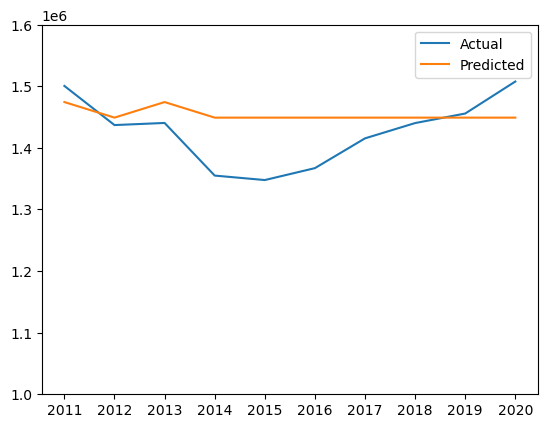

In [31]:
plt.plot(test_data_filtered['ResidCA'], label='Actual')
plt.plot(test_data_filtered['predictions'], label='Predicted')
plt.ylim(1000000, 1600000)
plt.legend()
plt.show()

In [32]:
# Evaluate the model using mean absolute error, mean squared error, and R^2
mae = mean_absolute_error(test_data_filtered['ResidCA'], y_pred)
mse = mean_squared_error(test_data_filtered['ResidCA'], y_pred)
r2 = r2_score(test_data_filtered['ResidCA'], y_pred)
mape = mean_absolute_percentage_error(test_data_filtered["ResidCA"], y_pred)

# Print the evaluation metrics
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('R^2 Score:', r2)
print('MAPE:', mape)

Mean Absolute Error: 45731.9
Mean Squared Error: 3251335076.9
R^2 Score: -0.14528726549300153
MAPE: 0.0327332591000269
